In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

--- Dataset Overview ---
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


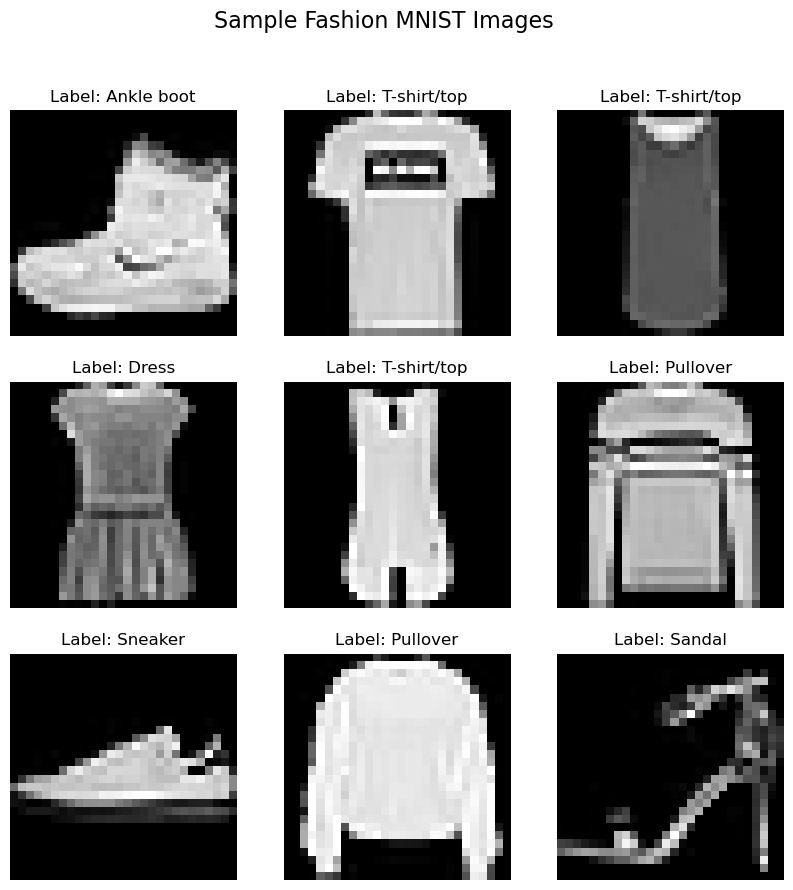

In [9]:
'''1. Load Dataset'''
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("--- Dataset Overview ---")
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}")   
print(f"Testing labels shape: {y_test.shape}") 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {class_names[y_train[i]]}")
    plt.axis('off')
plt.suptitle("Sample Fashion MNIST Images", fontsize=16)
plt.show()

In [10]:
'''2. Data Preprocessing'''
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)  

num_classes = len(class_names)
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

print("\n--- Data Preprocessing ---")
print(f"Normalized and reshaped training data shape: {X_train.shape}")
print(f"One-hot encoded training labels shape: {y_train_one_hot.shape}")


--- Data Preprocessing ---
Normalized and reshaped training data shape: (60000, 28, 28, 1)
One-hot encoded training labels shape: (60000, 10)


In [11]:
'''3. Build CNN Model'''
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

print("\n--- CNN Model Architecture ---")
model.summary()


--- CNN Model Architecture ---


c:\Users\asu\miniconda3\envs\xoder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
'''4. Compile Model'''
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\n--- Model Compilation ---")
print("Model compiled with Adam optimizer, Categorical Crossentropy loss, and Accuracy metric.")


--- Model Compilation ---
Model compiled with Adam optimizer, Categorical Crossentropy loss, and Accuracy metric.


In [13]:
'''5. Train Model'''
print("\n--- Model Training ---")
history = model.fit(X_train, y_train_one_hot,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=1)

print("\nModel Training Complete!")


--- Model Training ---
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.6828 - loss: 0.8705 - val_accuracy: 0.8500 - val_loss: 0.4002
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8404 - loss: 0.4460 - val_accuracy: 0.8740 - val_loss: 0.3361
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8675 - loss: 0.3717 - val_accuracy: 0.8823 - val_loss: 0.3113
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8790 - loss: 0.3357 - val_accuracy: 0.8913 - val_loss: 0.2863
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8882 - loss: 0.3040 - val_accuracy: 0.9012 - val_loss: 0.2643
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8954 - loss: 0.2904 - val_accuracy: 0.9035 - val_loss: 0.2587
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9008 - loss: 0.2730 - val_accuracy: 0.9063 - val_loss: 0.2485
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 


--- Model Evaluation on Test Data ---
Test Loss: 0.2696
Test Accuracy: 0.9049
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.91      0.85      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.81      0.90      0.85      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.88      0.84      0.86      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.78      0.63      0.70      1000
     Sneaker       0.94      0.99      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



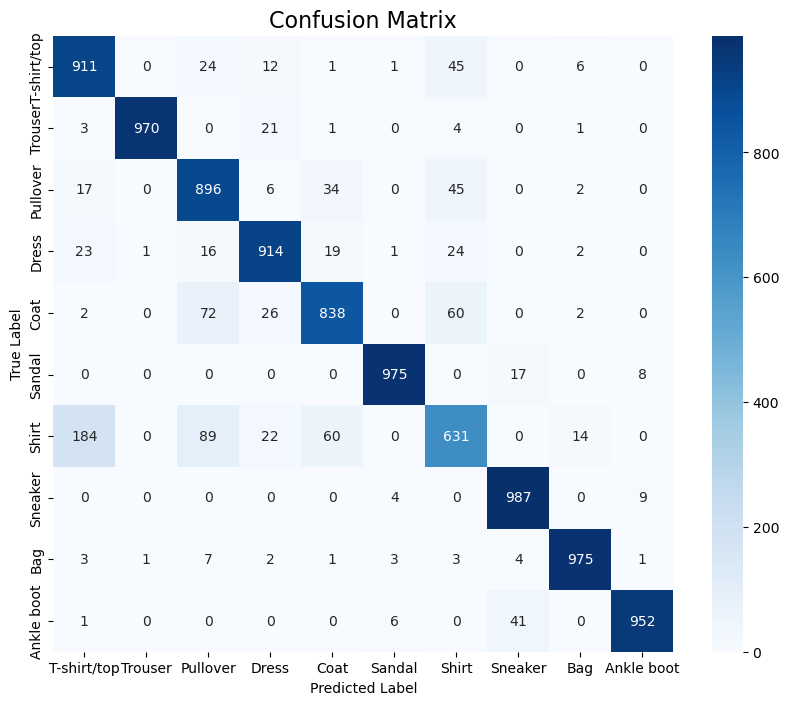


The confusion matrix shows the number of correct and incorrect predictions for each class.
The diagonal elements represent the number of points for which the predicted label is equal to the true label.


In [14]:
'''6. Evaluate Model'''
print("\n--- Model Evaluation on Test Data ---")
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) # Convert probabilities to class labels

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix', fontsize=16)
plt.show()
print("\nThe confusion matrix shows the number of correct and incorrect predictions for each class.")
print("The diagonal elements represent the number of points for which the predicted label is equal to the true label.")


--- Training History Visualization ---


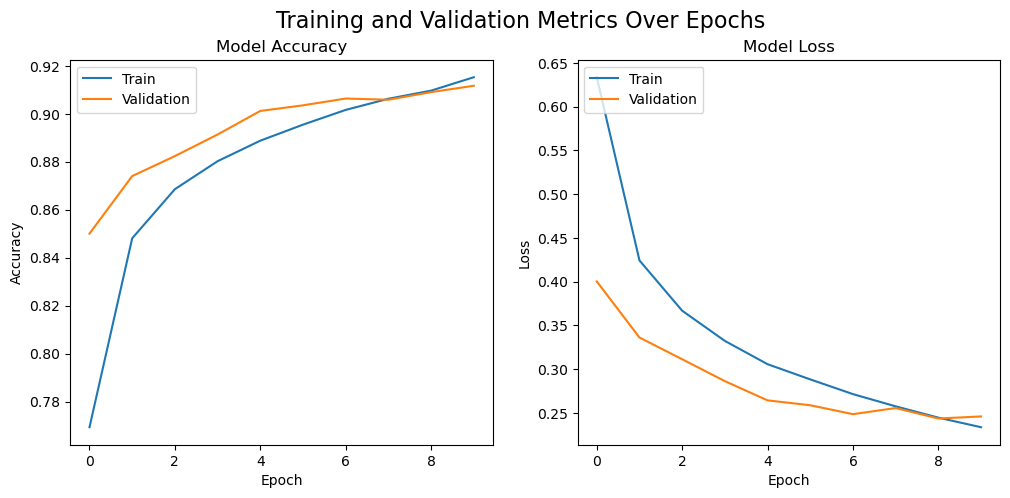

In [15]:
'''7. Visualize Training History'''
print("\n--- Training History Visualization ---")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.suptitle("Training and Validation Metrics Over Epochs", fontsize=16)
plt.show()